In [8]:
import sys
import os
import importlib
# make the module available from the src directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [12]:
from src.models.baseModels.resnet_regression import ResNetModel
importlib.reload(sys.modules['src.models.baseModels.resnet_regression'])

data_dir = '../datasets/artificial_data/'
dataset_name = 'SimpleNoisyImageGenerator'

resnet = ResNetModel(
    data_dir=f'{data_dir}{dataset_name}', 
    num_epochs=40,
    learning_rate=0.01,
    weight_decay=1e-4,
    early_stopping_tol=30,
    early_stopping_min_delta=10,
    depth=18,
)


resnet.load_data()
resnet.train()
resnet.evaluate()

Is cuda available:  False
Is mps available:  True
Epoch 1/40, Train Loss: 87685462683700.33, Val Loss: 257645329009711.16
Epoch 2/40, Train Loss: 149538989.21744573, Val Loss: 439053784.87692297
Epoch 3/40, Train Loss: 708.9763296411393, Val Loss: 2071.129590511322
Epoch 4/40, Train Loss: 7188.954647916428, Val Loss: 21226.462712287903
Epoch 5/40, Train Loss: 18632.587386785668, Val Loss: 54797.11920937896
Epoch 6/40, Train Loss: 10203.515646914218, Val Loss: 30160.023738116026
Epoch 7/40, Train Loss: 412.9478437038178, Val Loss: 1202.7269945144653
Epoch 8/40, Train Loss: 52.4790369196141, Val Loss: 153.59608021378517
Epoch 9/40, Train Loss: 989.6543360263744, Val Loss: 2924.9136178791523
Epoch 10/40, Train Loss: 421.71230058467137, Val Loss: 1230.6814959645271
Epoch 11/40, Train Loss: 17.448588026330825, Val Loss: 49.78226599097252
Epoch 12/40, Train Loss: 16.09068168477809, Val Loss: 46.036272913217545
Epoch 13/40, Train Loss: 16.845400850823584, Val Loss: 48.993115931749344


KeyboardInterrupt: 

In [11]:
from src.dataLoaders.DataLoader import DataSetLoader
importlib.reload(sys.modules['src.dataLoaders.DataLoader'])

dataset = 'SimpleNoisyImageGenerator'
data_loader = DataSetLoader(data_dir=f'{data_dir}{dataset}')
data_loader.load_data()

/Users/askelundsgaard/opt/anaconda3/envs/MLA/lib/python3.11/site-packages/torch/nn/modules/module.py:1368: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


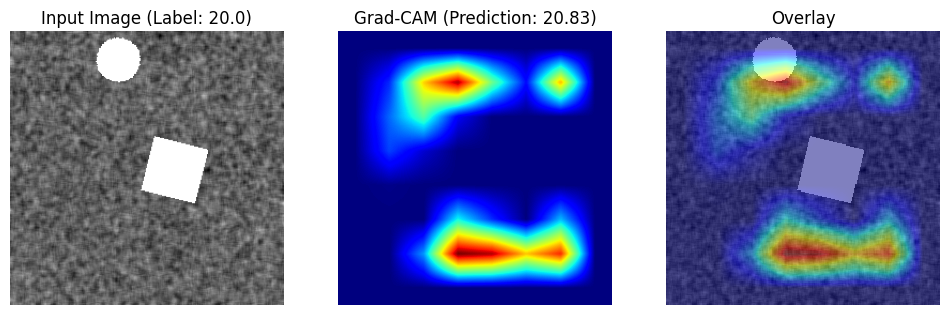

In [10]:
from src.XAI.ModifiedGradCam import ModifiedGradCam
importlib.reload(sys.modules['src.XAI.ModifiedGradCam'])
importlib.reload(sys.modules['src.XAI.utils.SaveFiles'])

grad_cam = ModifiedGradCam(resnet)
grad_cam.generate_grad_cam(index=6)

Max value in heatmap before ReLU is: tensor(0.0016, device='mps:0', grad_fn=<MaxBackward1>)


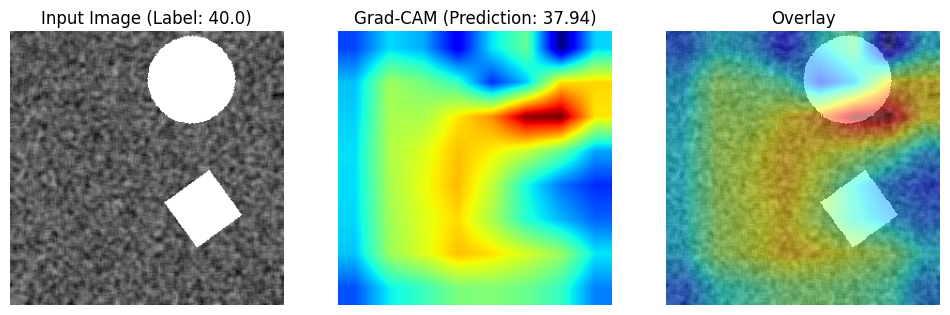

Max value in heatmap before ReLU is: tensor(0.0010, device='mps:0', grad_fn=<MaxBackward1>)


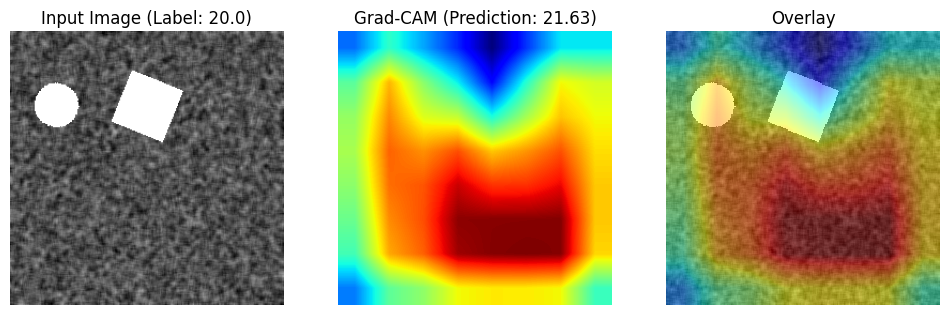

Max value in heatmap before ReLU is: tensor(0.0018, device='mps:0', grad_fn=<MaxBackward1>)


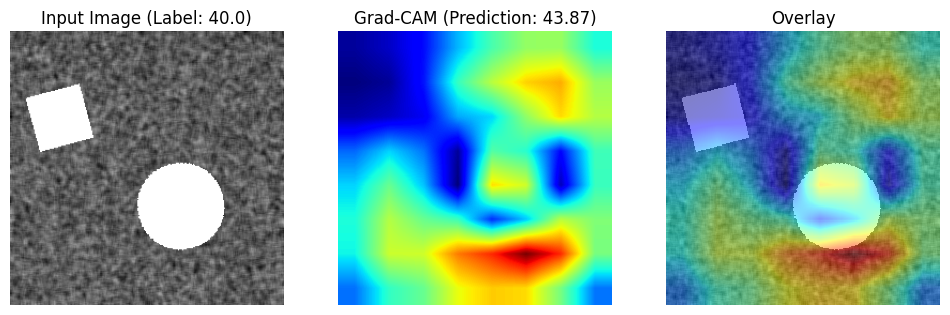

Max value in heatmap before ReLU is: tensor(0.0016, device='mps:0', grad_fn=<MaxBackward1>)


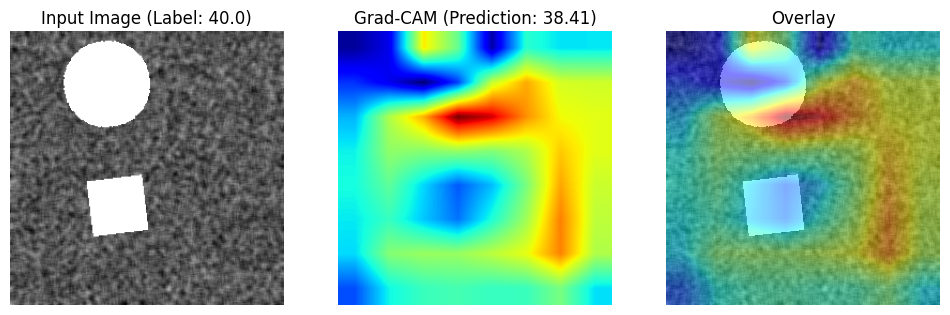

Max value in heatmap before ReLU is: tensor(0.0009, device='mps:0', grad_fn=<MaxBackward1>)


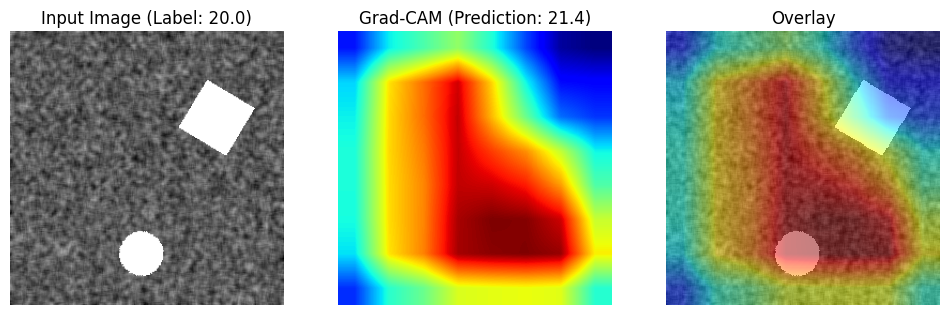

Max value in heatmap before ReLU is: tensor(0.0010, device='mps:0', grad_fn=<MaxBackward1>)


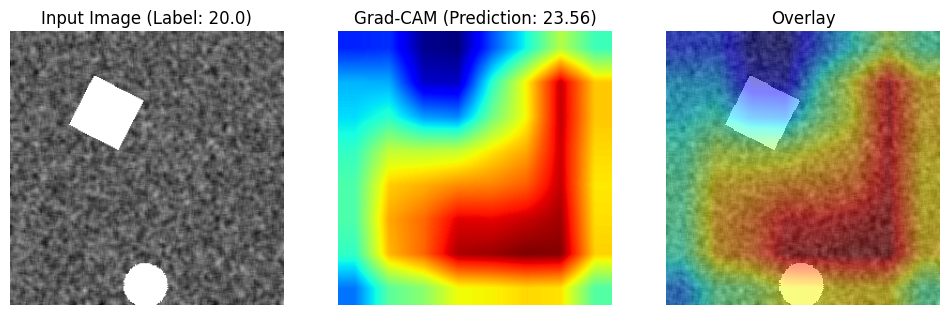

Max value in heatmap before ReLU is: tensor(0.0009, device='mps:0', grad_fn=<MaxBackward1>)


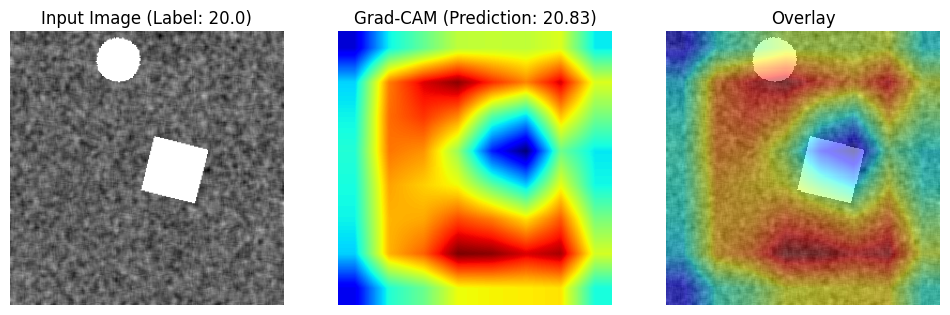

Max value in heatmap before ReLU is: tensor(0.0010, device='mps:0', grad_fn=<MaxBackward1>)


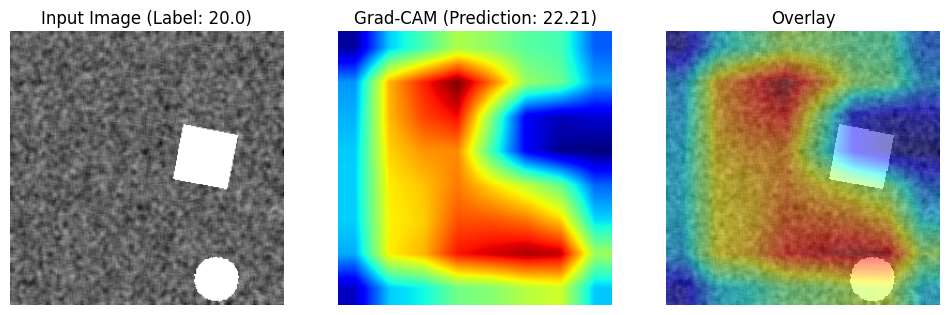

Max value in heatmap before ReLU is: tensor(0.0011, device='mps:0', grad_fn=<MaxBackward1>)


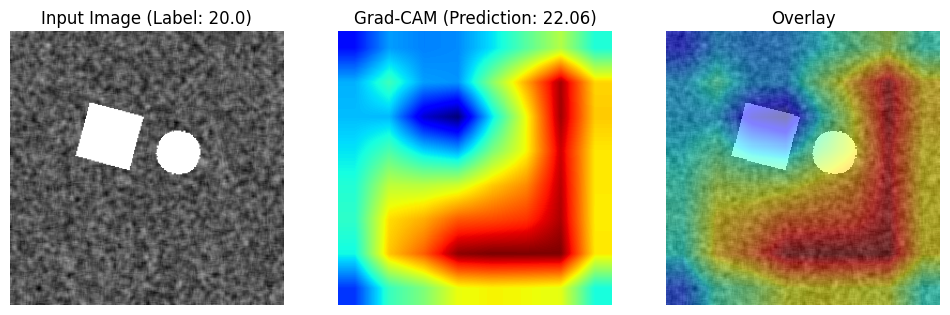

Max value in heatmap before ReLU is: tensor(0.0018, device='mps:0', grad_fn=<MaxBackward1>)


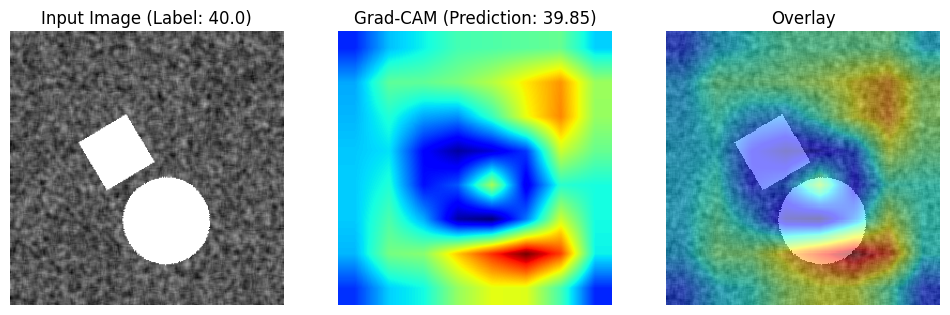

In [11]:
from src.XAI.GradCam import GradCamResnet
importlib.reload(sys.modules['src.XAI.GradCam'])
importlib.reload(sys.modules['src.XAI.utils.SaveFiles'])

grad_cam = GradCamResnet(resnet)
grad_cam.generateMultipleGradCam(20, save_output=True, save_dir='gradcam_output')

In [50]:
from src.XAI.DeepShap import DeepShapResnet
importlib.reload(sys.modules['src.XAI.DeepShap'])

# Initialize XAI instance
deepShap = DeepShapResnet(modelWrapper=resnet)

for i in range(5):
    deepShap.generate_deep_shap(index=i)

RuntimeError: Cannot use both regular backward hooks and full backward hooks on a single Module. Please use only one of them.